In [5]:
from utils import Graph
import glob
import re
from matplotlib import pyplot as plt
import numpy as np

A = 14
B = 180
P_v = [2, 7, 15]

def alpha(P,E):
    return P * A * np.exp(-B*P/E)

def reduced_alpha(x):
    return A * np.exp(-B/x)

def M(alpha,dx):
    return np.exp(alpha * dx)

def psi_to_torr(p):
    return p * 51.7149

spacing = np.logspace(3, 6, 20)
print(['%.2g'%i for i in spacing])

['1e+03', '1.4e+03', '2.1e+03', '3e+03', '4.3e+03', '6.2e+03', '8.9e+03', '1.3e+04', '1.8e+04', '2.6e+04', '3.8e+04', '5.5e+04', '7.8e+04', '1.1e+05', '1.6e+05', '2.3e+05', '3.4e+05', '4.8e+05', '7e+05', '1e+06']


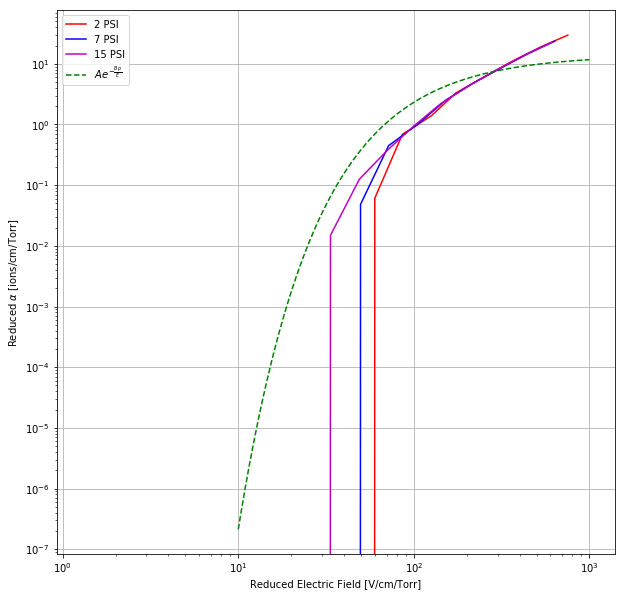

In [10]:
file_tree = [{}, {}, {}]

E_vals = [[], [], []]
alpha_vals = [[], [], []]
M_vals = [[], [], []]

colors = ['r', 'b', 'm']
colors_th = ['r--', 'b--', 'm--']

fig = plt.figure(figsize=(10,10))

for i, p in enumerate(P_v):
    for file in glob.glob('%i-psi/*.txt'%p):
        key = int(re.search(r'(\d*)(?:V)', file).group(1))
        if (key in file_tree[i]):
            file_tree[i][key].append(file)
        else:
            file_tree[i][key] = [file]
            
    for key, value in sorted(file_tree[i].items()):
        group = Graph(value)
        E_vals[i].append(key)
        alpha_vals[i].append(group.alpha())
        M_vals[i].append(group.M())
        
    plt.plot([v / psi_to_torr(p) for v in E_vals[i]], [a / psi_to_torr(p) for a in alpha_vals[i]], colors[i], label='%i PSI'%p)
    
x_v = np.logspace(1,3,100)
alpha_red_v = reduced_alpha(x_v)
plt.plot(x_v, alpha_red_v, 'g--', label=r'$Ae^{-\frac{Bp}{E}}$')

plt.xlabel('Reduced Electric Field [V/cm/Torr]')
plt.ylabel('Reduced $\\alpha$ [ions/cm/Torr]')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid()
plt.show()

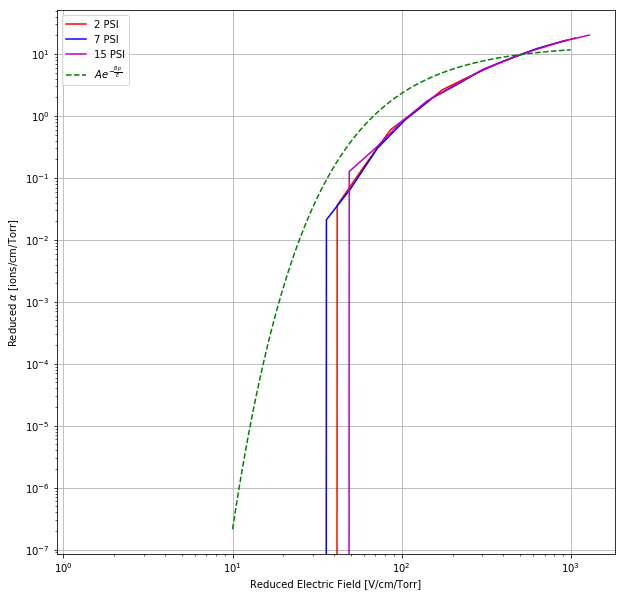

In [11]:
file_tree_th = [{}, {}, {}]

E_vals_th = [[], [], []]
alpha_vals_th = [[], [], []]
M_vals_th = [[], [], []]

colors = ['r', 'b', 'm']
colors_th = ['r--', 'b--', 'm--']

fig = plt.figure(figsize=(10,10))

for i, p in enumerate(P_v):
    for file in glob.glob('%i-psi/thermalized/*.txt'%p):
        key = int(re.search(r'(\d*)(?:V)', file).group(1))
        if (key in file_tree_th[i]):
            file_tree_th[i][key].append(file)
        else:
            file_tree_th[i][key] = [file]
            
    for key, value in sorted(file_tree_th[i].items()):
        group = Graph(value)
        E_vals_th[i].append(key)
        alpha_vals_th[i].append(group.alpha())
        M_vals_th[i].append(group.M())
        
    plt.plot([v / psi_to_torr(p) for v in E_vals_th[i]], [a / psi_to_torr(p) for a in alpha_vals_th[i]], colors[i], label='%i PSI'%p)
    
x_v = np.logspace(1,3,100)
alpha_red_v = reduced_alpha(x_v)
plt.plot(x_v, alpha_red_v, 'g--', label=r'$Ae^{-\frac{Bp}{E}}$')

plt.xlabel('Reduced Electric Field [V/cm/Torr]')
plt.ylabel('Reduced $\\alpha$ [ions/cm/Torr]')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid()
plt.show()

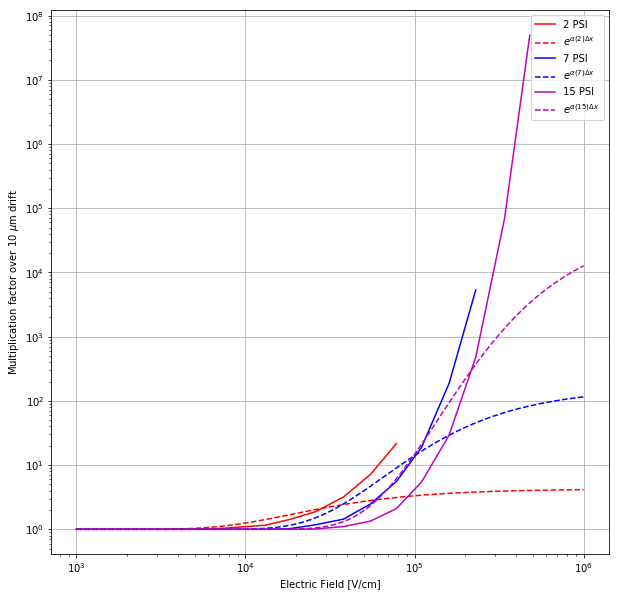

In [14]:
fig = plt.figure(figsize=(10,10))

E_v = np.logspace(3, 6, 100)
for i, p in enumerate(P_v):
    plt.plot(E_vals[i], M_vals[i], colors[i], label='%i PSI'%p)
    a_v = alpha(psi_to_torr(p), E_v)
    mult_v = M(a_v, 0.001)
    plt.plot(E_v, mult_v, colors_th[i], label=r'$e^{\alpha(%i)\Delta{x}}$'%p)

plt.xlabel('Electric Field [V/cm]')
plt.ylabel('Multiplication factor over 10 $\mu$m drift')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid()
plt.show()

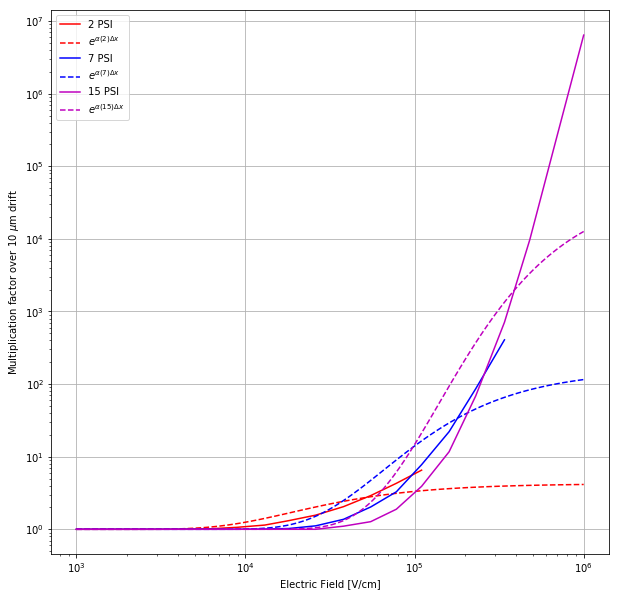

In [13]:
fig = plt.figure(figsize=(10,10))

E_v = np.logspace(3, 6, 100)
for i, p in enumerate(P_v):
    plt.plot(E_vals_th[i], M_vals_th[i], colors[i], label='%i PSI'%p)
    a_v = alpha(psi_to_torr(p), E_v)
    mult_v = M(a_v, 0.001)
    plt.plot(E_v, mult_v, colors_th[i], label=r'$e^{\alpha(%i)\Delta{x}}$'%p)

plt.xlabel('Electric Field [V/cm]')
plt.ylabel('Multiplication factor over 10 $\mu$m drift')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid()
plt.show()